In [9]:
import torch
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [10]:
url = r"C:\Users\Дарина\OneDrive\Робочий стіл\3 курс 1 семестр\Машинне\machine\household_power_consumption.csv"
df = pd.read_csv(url, sep=',', low_memory=False, parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['nan', '?'])



df = df[['datetime', 'Voltage']].dropna()


scaler = MinMaxScaler(feature_range=(0, 1))
df['Voltage'] = scaler.fit_transform(df[['Voltage']])


C:\Users\Дарина\AppData\Local\Temp\ipykernel_8016\3878496451.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(url, sep=',', low_memory=False, parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['nan', '?'])
C:\Users\Дарина\AppData\Local\Temp\ipykernel_8016\3878496451.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(url, sep=',', low_memory=False, parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['nan', '?'])
C:\Users\Дарина\AppData\Local\Temp\ipykernel_8016\3878496451.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (t

In [11]:
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
df = df[['datatime', 'Voltage']]

df['Voltage'] = df['Voltage'].interpolate(method='linear')

df['Voltage'] = df['Voltage'].fillna(method='fill').fillna(method='bfill')

In [12]:
X = df['Voltage'].values.reshape(-1, 1)
y = df['Voltage'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.0049 - mean_absolute_error: 0.0161 - val_loss: 3.1481e-08 - val_mean_absolute_error: 5.1809e-05
Epoch 2/5
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 4.4439e-07 - mean_absolute_error: 3.6469e-04 - val_loss: 8.0196e-09 - val_mean_absolute_error: 7.7132e-05
Epoch 3/5
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 6.1915e-07 - mean_absolute_error: 3.9969e-04 - val_loss: 4.4703e-06 - val_mean_absolute_error: 0.0021
Epoch 4/5
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 5.9753e-07 - mean_absolute_error: 3.6301e-04 - val_loss: 3.4493e-09 - val_mean_absolute_error: 4.1941e-05
Epoch 5/5
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 4.9844e-07 - mean_absolute_error: 3.8653e-04 - val_loss: 1.3237e-08 - val_mean_absolute_error: 7.8465e-05


In [13]:
from sklearn.metrics import r2_score


loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")
print(f"Test R-squared (Accuracy): {r2}")


1543/1543 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7381e-08 - mean_absolute_error: 8.0257e-05
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test Loss: 1.3237036355917553e-08
Test MAE: 7.846510561648756e-05
Test R-squared (Accuracy): 0.9999979332106551


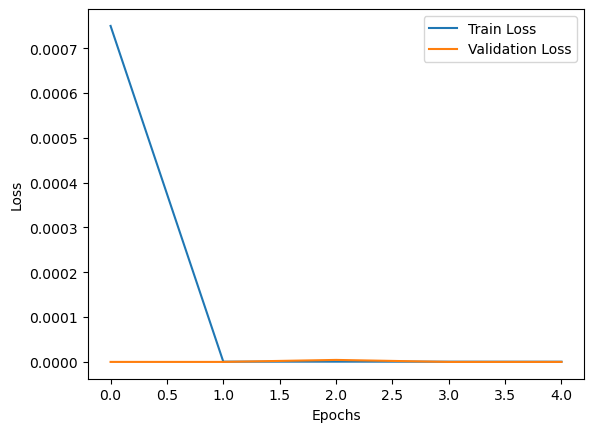

In [14]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


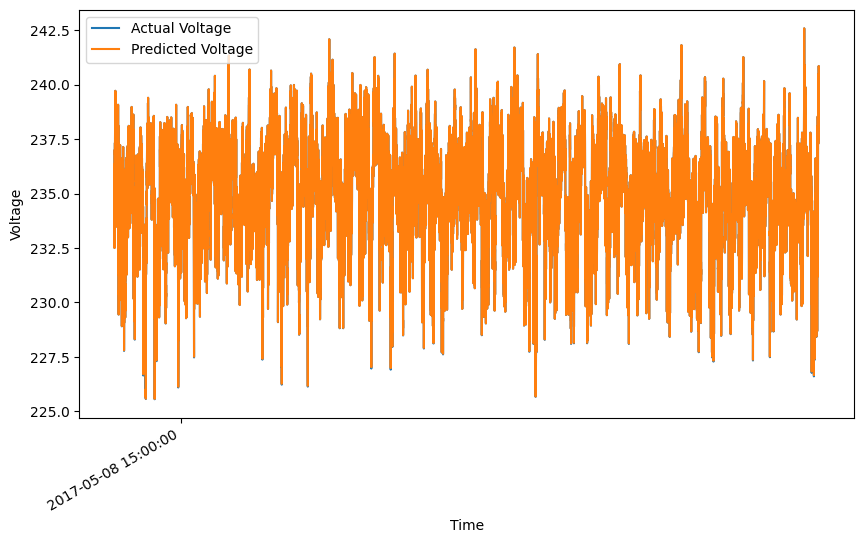

In [15]:
import matplotlib.dates as mdates

# Denormalize the actual and predicted voltage values
y_test_denorm = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_denorm = scaler.inverse_transform(y_pred)

# Extract the datetime values corresponding to the test data
time_test = df['datetime'].values[-len(X_test):]

# Plot the actual vs predicted values (denormalized)
plt.figure(figsize=(10, 6))
plt.plot(time_test, y_test_denorm, label='Actual Voltage')
plt.plot(time_test, y_pred_denorm, label='Predicted Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()

# Format the x-axis to show datetime
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1000))  # Adjust interval as needed
plt.gcf().autofmt_xdate()  # Rotate and format x-axis labels

plt.show()


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


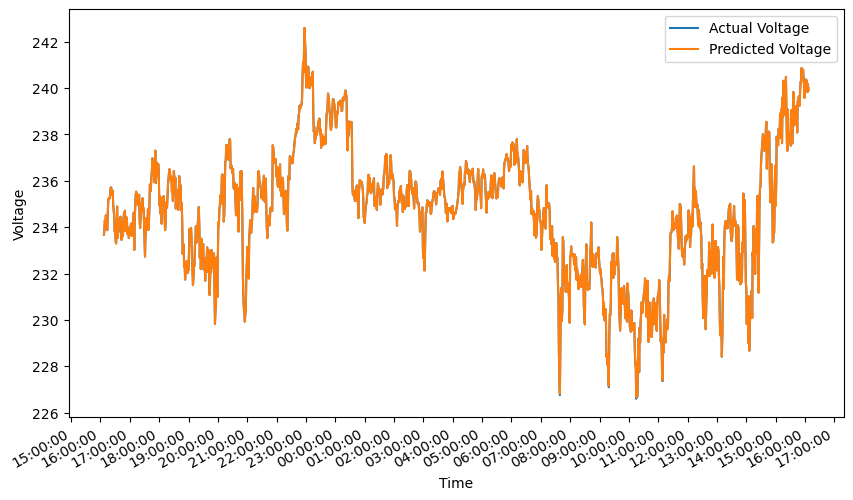

In [16]:
import matplotlib.dates as mdates

# Select only the last 24 hours of data
# Assuming 'datetime' is already in datetime format
start_time = df['datetime'].max() - pd.Timedelta(days=1)  # 24 hours from the last timestamp
df_24_hours = df[df['datetime'] >= start_time]

# Rebuild X_test and y_test for the last 24 hours
X_test_24 = df_24_hours['Voltage'].values.reshape(-1, 1)
y_test_24 = df_24_hours['Voltage'].values

# Predict based on the last 24 hours of test data
y_pred_24 = model.predict(X_test_24)

# Denormalize the actual and predicted voltage values
y_test_24_denorm = scaler.inverse_transform(y_test_24.reshape(-1, 1))
y_pred_24_denorm = scaler.inverse_transform(y_pred_24)

# Extract the datetime values corresponding to the last 24 hours
time_test_24 = df_24_hours['datetime'].values

# Plot the actual vs predicted values (denormalized) for 24 hours
plt.figure(figsize=(10, 6))
plt.plot(time_test_24, y_test_24_denorm, label='Actual Voltage')
plt.plot(time_test_24, y_pred_24_denorm, label='Predicted Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()

# Format the x-axis to show datetime for the last 24 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # 1-hour intervals
plt.gcf().autofmt_xdate()  # Rotate and format x-axis labels

plt.show()
